Visualizing and Comparing Image Reconstruction Using DFT and Wavelet Transform<br>
Objective: Perform image reconstruction using both the Discrete Fourier Transform (DFT) and Wavelet Transform, and compare their performance in terms of visual quality and PSNR. Also, visualize the frequency components before and after zeroing out coefficients.<br>
<br>
Instructions:<br>

1. Input Image: Load given grayscale image OpenCV.<br>
2. DFT Analysis and Reconstruction: (4 marks)<br>
o Apply the Discrete Fourier Transform (DFT) to the image.<br>
o Visualize the DFT frequency spectrum.<br>
o Reconstruct the image using the inverse DFT with the remaining coefficients.<br>
o Visualize the reconstructed image after applying DFT and compare it with the original image.<br>

3. Wavelet Transform Analysis and Reconstruction: (6 marks)<br>
o Apply the Wavelet Transform (using a suitable wavelet, e.g., Haar or Daubechies) to the image.<br>
o Visualize the Wavelet decomposition in level 1 & level 2<br>
o Reconstruct the image using the inverse Wavelet Transform with the remaining coefficients.<br>
o Visualize the reconstructed image after applying Wavelet and compare it with the original image.<br>

4. Comparison: (4 marks)<br>
o PSNR Calculation: Calculate the PSNR between the original image and the reconstructed images for both DFT and Wavelet approaches.<br>
o Compare the PSNR values for DFT and Wavelet.<br>
o Discuss the visual differences between the DFT-reconstructed image and the Wavelet-reconstructed image.<br>

5. Visualization of DFT & wavelet (expected visualization of wavelet ) ( 6 marks)

<b>STEP 1: Loading the Image using OpenCV</b>

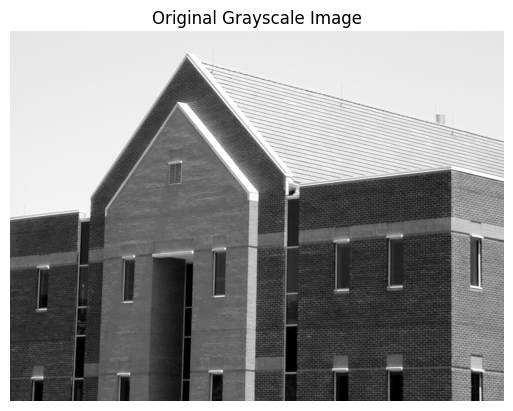

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load the grayscale image
image = cv2.imread('image.tif', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()


Explanation:<br>

The image is loaded in grayscale mode using cv2.imread().<br>
plt.imshow() visualizes the image using the gray colormap.

<b>STEP 2:DFT Analysis and Reconstruction</b>

<b>2.1</b> Apply the DFT and Visulaize the frequency spectrum

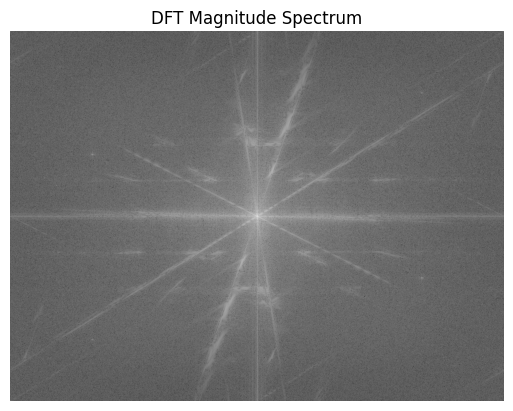

In [28]:
# Apply DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()


Explanation:<br>

We use cv2.dft() to compute the DFT of the image.<br>
np.fft.fftshift() shifts the zero frequency component to the center of the spectrum.<br>
The magnitude spectrum is calculated and visualized to show the frequency components.

<b>2.2</b> Inverse DFT for Reconstruction and Visualization

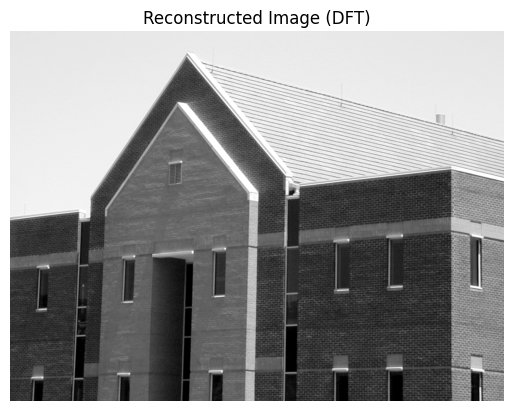

In [29]:
# Reconstruct image using Inverse DFT
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image_dft = cv2.idft(idft_shift)
reconstructed_image_dft = cv2.magnitude(reconstructed_image_dft[:,:,0], reconstructed_image_dft[:,:,1])

# Normalize the reconstructed image
reconstructed_image_dft = cv2.normalize(reconstructed_image_dft, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image_dft = reconstructed_image_dft.astype(np.uint8)

# Display the reconstructed image
plt.imshow(reconstructed_image_dft, cmap='gray')
plt.title('Reconstructed Image (DFT)')
plt.axis('off')
plt.show()

Explanation:<br>

We apply cv2.idft() to get the inverse DFT, reconstructing the image.<br>
The reconstructed image is normalized for visualization.

<b>2.3</b> Comparison of Original and Reconstructed DFT

In [32]:
# Calculate PSNR for DFT-reconstructed image
psnr_dft = psnr(image, reconstructed_image_dft)

print("Comparing both of them -: \n")
print(f'DFT Reconstructed and Original: {psnr_dft:.2f} dB')

Comparing both of them : 

DFT Reconstructed and Original: 48.72 dB


Explanation:

<b>STEP 3: Wavelet Transform Analysis and Reconstruction</b>

<b>3.1</b> Apply Wavelet Transfrom and Visualize the Decomposition

In [7]:
import pywt

# Perform a single-level 2D Discrete Wavelet Transform
coeffs1 = pywt.dwt2(image, 'haar')
LL1, (LH1, HL1, HH1) = coeffs1

# Perform a second-level decomposition on the LL1 band
coeffs2 = pywt.dwt2(LL1, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2

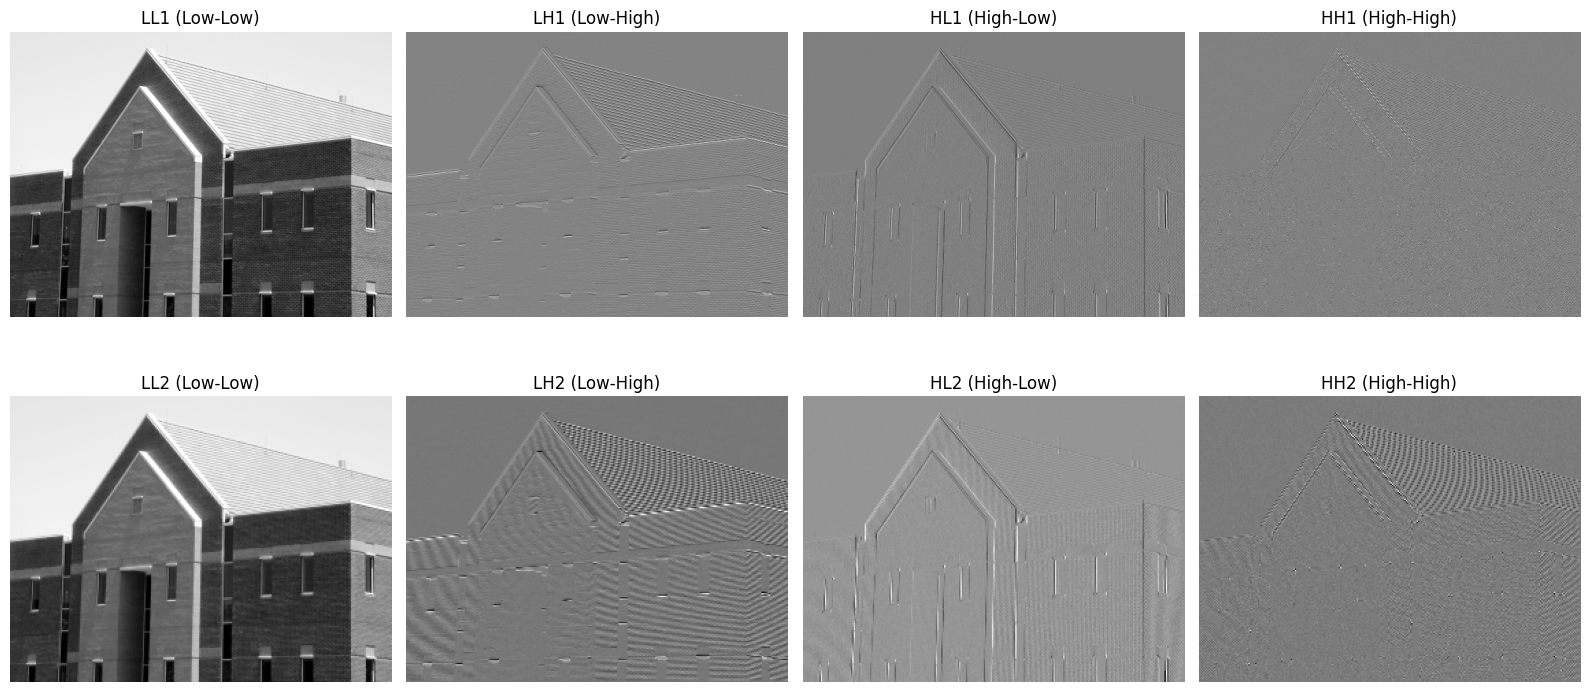

In [8]:
# Function to display and compare Level 1 and Level 2 frequency bands
def plot_comparison_LL_LH_HL_HH():
    plt.figure(figsize=(16, 8))
    
    # Level 1 Bands
    plt.subplot(2, 4, 1)
    plt.imshow(LL1, cmap='gray')
    plt.title('LL1 (Low-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(LH1, cmap='gray')
    plt.title('LH1 (Low-High)')
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(HL1, cmap='gray')
    plt.title('HL1 (High-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(HH1, cmap='gray')
    plt.title('HH1 (High-High)')
    plt.axis('off')

    # Level 2 Bands
    plt.subplot(2, 4, 5)
    plt.imshow(LL2, cmap='gray')
    plt.title('LL2 (Low-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 6)
    plt.imshow(LH2, cmap='gray')
    plt.title('LH2 (Low-High)')
    plt.axis('off')

    plt.subplot(2, 4, 7)
    plt.imshow(HL2, cmap='gray')
    plt.title('HL2 (High-Low)')
    plt.axis('off')

    plt.subplot(2, 4, 8)
    plt.imshow(HH2, cmap='gray')
    plt.title('HH2 (High-High)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Compare frequency bands for resolution variation
plot_comparison_LL_LH_HL_HH()


Explanation:<br>

We use pywt.wavedec2() to apply a 2-level wavelet decomposition.<br>
Or we use pywt.dwt2() for one level decomposition.<br>
The approximation (LL) and details (LH, HL, HH) of the wavelet transform are visualized.

<b>3.2</b> Recontsruct the Image using Inverse Wavelet Transform

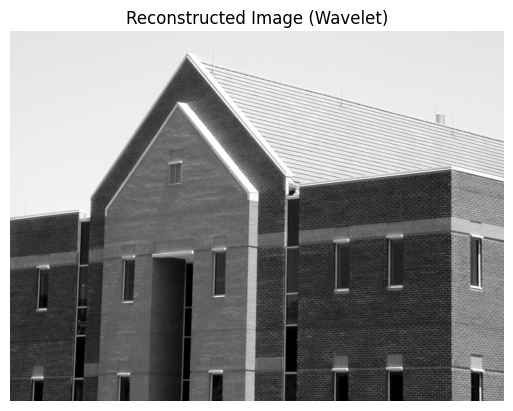

In [22]:
coeffs = pywt.wavedec2(image, 'haar', level=2)
# Reconstruct the image using the inverse Wavelet Transform
reconstructed_image_wavelet = pywt.waverec2(coeffs, 'haar')

# Normalize the reconstructed image to ensure pixel values are between 0 and 255
reconstructed_image_wavelet = cv2.normalize(reconstructed_image_wavelet, None, 0, 255, cv2.NORM_MINMAX)
reconstructed_image_wavelet = reconstructed_image_wavelet.astype(np.uint8)

# Display the reconstructed image from the Wavelet transform
plt.imshow(reconstructed_image_wavelet, cmap='gray')
plt.title('Reconstructed Image (Wavelet)')
plt.axis('off')
plt.show()

Explanation:<br>

The inverse wavelet transform is applied using pywt.waverec2() to reconstruct the image

<b>3.3</b> Comparison of Reconstructed Wavelet Image and Original Image

In [34]:
# Calculate PSNR for Wavelet-reconstructed image
psnr_wavelet = psnr(image, reconstructed_image_wavelet)

print("Comparing both of them : \n")
print(f'Wavelet Reconstructed and Original: {psnr_wavelet:.2f} dB')

Comparing both of them : 

Wavelet Reconstructed and Original: 48.75 dB


<b>STEP 4: Comparison</b>

In [35]:
# Calculate PSNR for DFT-reconstructed image
psnr_dft = psnr(image, reconstructed_image_dft)

# Calculate PSNR for Wavelet-reconstructed image
psnr_wavelet = psnr(image, reconstructed_image_wavelet)

# Calculate PSNR for DFT Reconstructed and Wavelet-reconstructed image
psnr_dftwavelet = psnr(reconstructed_image_dft, reconstructed_image_wavelet)

print("Comparing them : \n")
print(f'DFT Reconstructed and Original: {psnr_dft:.2f} dB')
print(f'Wavelet Reconstructed Original: {psnr_wavelet:.2f} dB')
print(f'DFT Reconstructed and Wavelet Reconstructed: {psnr_dftwavelet:.2f} dB')

Comparing them : 

DFT Reconstructed and Original: 48.72 dB
Wavelet Reconstructed Original: 48.75 dB
DFT Reconstructed and Wavelet Reconstructed: 56.15 dB


Explanation:<br>

We use the psnr() function from skimage.metrics to calculate the PSNR for both reconstruction methods.<br>
Higher the PSNR indicating less loss.

Comparing them by vsualization : 



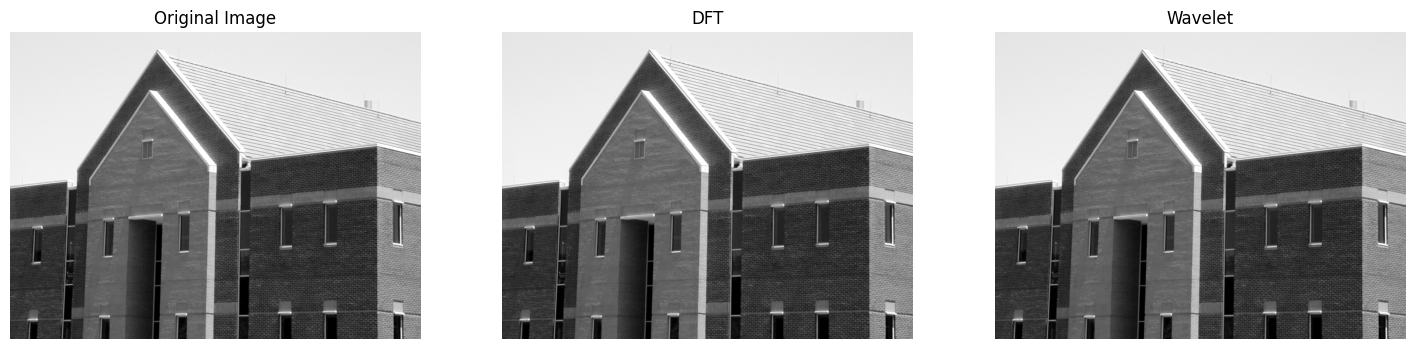

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
print("Comparing them by vsualization : \n")


axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(reconstructed_image_dft, cmap='gray')
axs[1].set_title('DFT')
axs[1].axis('off')

axs[2].imshow(reconstructed_image_wavelet, cmap='gray')
axs[2].set_title('Wavelet')
axs[2].axis('off')

plt.show()


Comparison:<br>
Visualize both reconstructed images side by side for comparison.<br>

Inference:<br>
This step allows you to visually compare the DFT and Wavelet reconstructed images and observe how well each technique preserves the original image quality.

<b>STEP 5: Visualization of DFT & Wavelet</b>

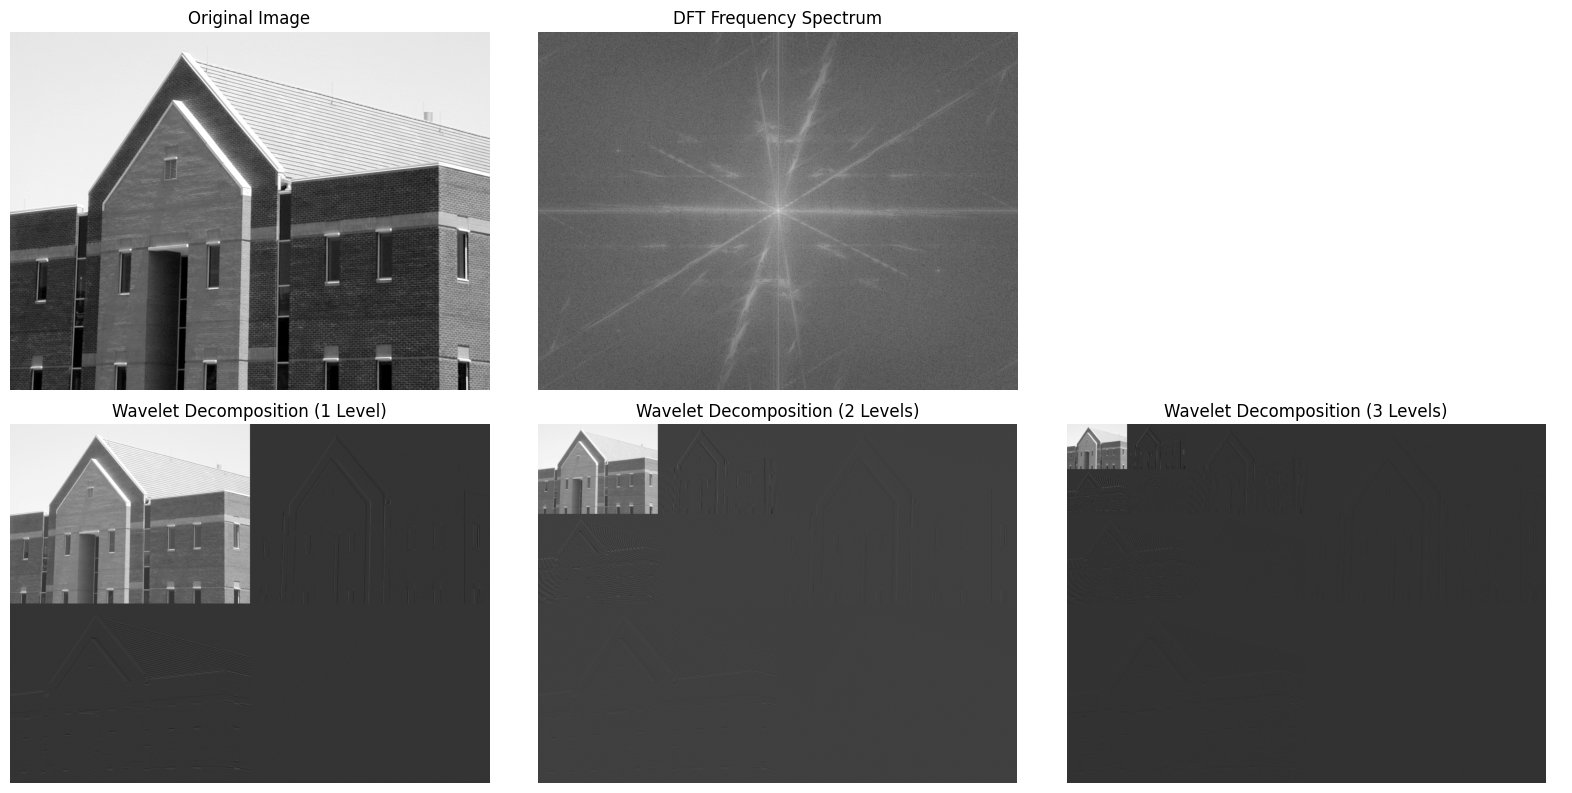

In [43]:

# Load the image
image = np.array(image, dtype=np.float32)

# Apply Discrete Fourier Transform (DFT) - Visualization
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted) + 1)

# Wavelet Decomposition (using Haar wavelets)
coeffs_1level = pywt.wavedec2(image, 'haar', level=1)
coeffs_2level = pywt.wavedec2(image, 'haar', level=2)
coeffs_3level = pywt.wavedec2(image, 'haar', level=3)

# Recompose the wavelet coefficients into an array for easy plotting
def recompose_coeffs(coeffs):
    coeffs_array, coeff_slices = pywt.coeffs_to_array(coeffs)
    return coeffs_array

# Get the decomposed images
coeffs_image_1 = recompose_coeffs(coeffs_1level)
coeffs_image_2 = recompose_coeffs(coeffs_2level)
coeffs_image_3 = recompose_coeffs(coeffs_3level)

# Plotting DFT and Wavelet Decomposition Visualizations
fig, ax = plt.subplots(2, 3, figsize=(16, 8))

# Original Image
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# DFT Frequency Spectrum
ax[0, 1].imshow(magnitude_spectrum, cmap='gray')
ax[0, 1].set_title('DFT Frequency Spectrum')
ax[0, 1].axis('off')

# Wavelet Decomposition - 1 Level
ax[1, 0].imshow(coeffs_image_1, cmap='gray')
ax[1, 0].set_title('Wavelet Decomposition (1 Level)')
ax[1, 0].axis('off')

# Wavelet Decomposition - 2 Levels
ax[1, 1].imshow(coeffs_image_2, cmap='gray')
ax[1, 1].set_title('Wavelet Decomposition (2 Levels)')
ax[1, 1].axis('off')

# Wavelet Decomposition - 3 Levels
ax[1, 2].imshow(coeffs_image_3, cmap='gray')
ax[1, 2].set_title('Wavelet Decomposition (3 Levels)')
ax[1, 2].axis('off')

# Remove the empty plots
ax[0, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



Summary<br>
We have successfully:<br>

1. Applied DFT and visualized the frequency spectrum.<br>
2. Applied Wavelet Transform and visualized the decomposition.<br>
3. Reconstructed the image using both techniques.<br>
4. Calculated PSNR for both approaches and visually compared the results.<br>